## Handwritten Digit Classifier using KNN and MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('./data/mnist/mnist_train.csv')
print(df.shape)
print(df.columns)

(60000, 785)
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = df.values
x = data[:,1:]
y = data[:,0]

print(x.shape, y.shape)

(60000, 784) (60000,)


In [5]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784))

In [6]:
y

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,))

In [7]:
split = int(0.8 * x.shape[0])
split

48000

In [8]:
xtrain = x[:split,:]
ytrain = y[:split]

xtest = x[split:,:]
ytest = y[split:]

print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(48000, 784) (48000,) (12000, 784) (12000,)


In [11]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

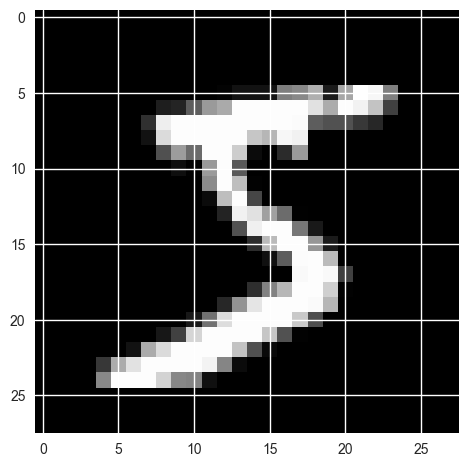

5


In [13]:
drawImg(xtrain[0])
print(ytrain[0])

In [14]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [15]:
def knn(x,y,query,k=5):
    pairs = [] # pair(distance, class)
    
    for i in range(x.shape[0]):
        d=dist(query, x[i])
        pairs.append((d,y[i]))
        
    pairs = sorted(pairs)
    pairs = pairs[:k] # isolate first k pairs
    
    pairs = np.array(pairs)
    pair_counts = np.unique(pairs[:,1], return_counts=True)
    # print(pair_counts)
    idx = pair_counts[1].argmax()
    
    pred = pair_counts[0][idx]
    return pred

In [16]:
pred = knn(xtrain, ytrain, xtest[1])
print(pred)
print(ytest[1])

7.0
7


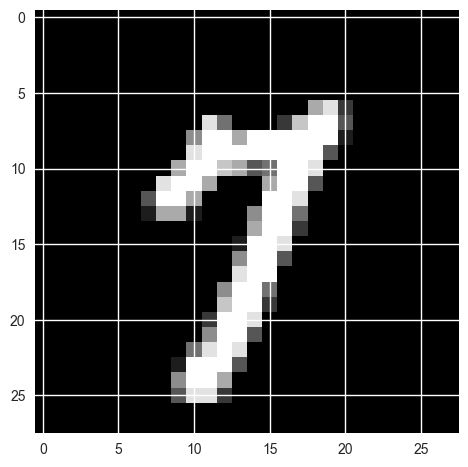

In [17]:
drawImg(xtest[1])

In [33]:
def accuracy(xtest, ytest):
    lim = 5000
    n = xtest.shape[0]
    correct = 0
    
    for i in range(n):
        pred = knn(xtrain[:lim,:], ytrain[:lim], xtest[i])
        if pred == ytest[i]:
            correct += 1        
    
    return correct/n

In [34]:
acc = accuracy(xtest[:100,:], ytest[:100])

In [35]:
print('Accuracy: ', end=' ')
print(100*acc, '%', sep='')

Accuracy:  94.0%
